In [415]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve

import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
import pickle

In [307]:
#reading the data from my directory
data = pd.read_csv("/users/uneku/downloads/australian.dat")
data.columns.values[0]='A'
data.head()

,A
0,0 22.67 7 2 8 4 0.165 0 0 0 0 2 160 1 0
1,0 29.58 1.75 1 4 4 1.25 0 0 0 1 2 280 1 0
2,0 21.67 11.5 1 5 3 0 1 1 11 1 2 0 1 1
3,1 20.17 8.17 2 6 4 1.96 1 1 14 0 2 60 159 1
4,0 15.83 0.585 2 8 8 1.5 1 1 2 0 2 100 1 1


In [308]:
#saving the data to a csv to visualize on my laptop
#data.to_csv('auData.csv', index= False, header = True)

In [309]:
#seperating the data into seperate columns for workability and clarity
wData = data.A.str.split(expand=True,)
wData.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
2,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1
3,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1


In [310]:
#First Model = Random Forest

In [311]:
wData = wData.dropna(axis=0)

In [312]:
x= wData.iloc[:,1:14].values
print(x)

[['22.67' '7' '2' ... '2' '160' '1']
 ['29.58' '1.75' '1' ... '2' '280' '1']
 ['21.67' '11.5' '1' ... '2' '0' '1']
 ...
 ['18.83' '9.54' '2' ... '2' '100' '1']
 ['27.42' '14.5' '2' ... '2' '120' '12']
 ['41' '0.04' '2' ... '1' '560' '1']]


In [313]:
y = wData.iloc[:,14].values
print(y)

['0' '0' '1' '1' '1' '0' '1' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0'
 '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1'
 '1' '1' '1' '1' '0' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0'
 '1' '1' '0' '1' '1' '0' '0' '1' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0'
 '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '1'
 '0' '0' '0' '0' '1' '0' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '0' '1'
 '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '0' '1' '0'
 '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1'
 '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '0'
 '0' '1' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0' '1' '0'
 '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '1'
 '1' '0' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0' '1

In [314]:
scaler = MinMaxScaler()
#normalize = scaler.fit_transform(wdata)
scaler.fit(wData)

MinMaxScaler()

In [315]:
#Splitting data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 1)

In [316]:
#Applying the RandomForestClassifier Model
num_trees=5
dt_model = RandomForestClassifier(random_state=1, max_depth= 8, max_samples=350, max_features=8,bootstrap= True, n_estimators=num_trees)

#Fit RandomForestClassifier model
dt_model.fit(x_train, y_train)


predicted_values=dt_model.predict(x_train[0:14,:])
original_values=y_train[:14]
print("The original values are :",original_values)
print("The predicted values generated are :", predicted_values)

training_accuracy=accuracy_score(original_values, predicted_values, normalize=False)
print("Accuracy Score in Training Dataset :", training_accuracy)



predicted_values=dt_model.predict(x_test[0:14,:])
original_values=y_test[0:14]
print("The original values are: ", original_values)
print("The predicted values are :", predicted_values)

testing_accuracy=accuracy_score(original_values, predicted_values, normalize=False)
print("Accuracy Score in Testing Dataset :", testing_accuracy)

The original values are : ['1' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1']
The predicted values generated are : ['1' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1']
Accuracy Score in Training Dataset : 14
The original values are:  ['0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '1' '1']
The predicted values are : ['0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1' '1']
Accuracy Score in Testing Dataset : 13


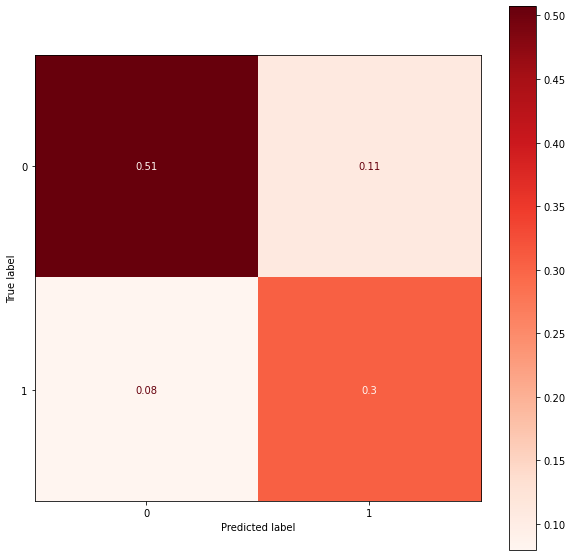

In [317]:
#confusion matrix


fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt_model, x_test, y_test, cmap= plt.cm.Reds, ax = ax, normalize ='all')


In [318]:
#Measuring the accuracy of the model
training_accuracy = accuracy_score(y_train, dt_model.predict(x_train))
print("Average Model Train Accuracy is :", training_accuracy)

testing_accuracy_model1 = accuracy_score(y_test, dt_model.predict(x_test))
print("Average Test Accuracy of model 1 is :", testing_accuracy_model1)

Average Model Train Accuracy is : 0.9528130671506352
Average Test Accuracy of model 1 is : 0.8115942028985508


In [319]:
#generating the dot file
from sklearn.tree import export_graphviz

viz = x

for index in range(0, num_trees):
    export_graphviz(dt_model.estimators_[index], out_file='tree'+str(index)+ '_.dot',
                   feature_names = None,
                   rounded = True, proportion = False,
                   precision = 2, filled = True)


#Second Model = keras Neural Network 

In [320]:
NNmodel = data.A.str.split(expand=True,)
NNmodel.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,22.67,7,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.75,1,4,4,1.25,0,0,0,1,2,280,1,0
2,0,21.67,11.5,1,5,3,0,1,1,11,1,2,0,1,1
3,1,20.17,8.17,2,6,4,1.96,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.5,1,1,2,0,2,100,1,1


In [321]:
for i in range(0,15):
    NNmodel[i]= NNmodel[i].astype(float)
NNmodel.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object

In [322]:
x= NNmodel.iloc[:,1:14].values
print (x)

[[2.267e+01 7.000e+00 2.000e+00 ... 2.000e+00 1.600e+02 1.000e+00]
 [2.958e+01 1.750e+00 1.000e+00 ... 2.000e+00 2.800e+02 1.000e+00]
 [2.167e+01 1.150e+01 1.000e+00 ... 2.000e+00 0.000e+00 1.000e+00]
 ...
 [1.883e+01 9.540e+00 2.000e+00 ... 2.000e+00 1.000e+02 1.000e+00]
 [2.742e+01 1.450e+01 2.000e+00 ... 2.000e+00 1.200e+02 1.200e+01]
 [4.100e+01 4.000e-02 2.000e+00 ... 1.000e+00 5.600e+02 1.000e+00]]


In [323]:
y = NNmodel.iloc[:,14].values
print(y)

[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.

In [324]:
#Splitting data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 1)

In [325]:
#Scaling the data
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [326]:
mdl = Sequential()

mdl.add(Dense(units=7, kernel_initializer = 'uniform',activation= 'relu', input_dim=13))
mdl.add(Dense(units=7, kernel_initializer = 'uniform',activation= 'relu'))
mdl.add(Dense(units=1, kernel_initializer = 'uniform',activation= 'sigmoid'))
mdl.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

mdl.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 7)                 98        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [327]:
y_pred= mdl.predict(x_test)

In [328]:
Modelhistory= mdl.fit(x_train,y_train, batch_size=350, epochs = 10)

Epoch 1/10
2/2 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5191
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5481
Epoch 3/10
2/2 [==============================] - 0s 14ms/step - loss: 0.6929 - accuracy: 0.5390
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5390
Epoch 5/10
2/2 [==============================] - 0s 11ms/step - loss: 0.6927 - accuracy: 0.5390
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.5390
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5390
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5390
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5390
Epoch 10/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5390


In [329]:
#ploting the history of the Neural network model training
Modelhistory.history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'Model Accuracy ')

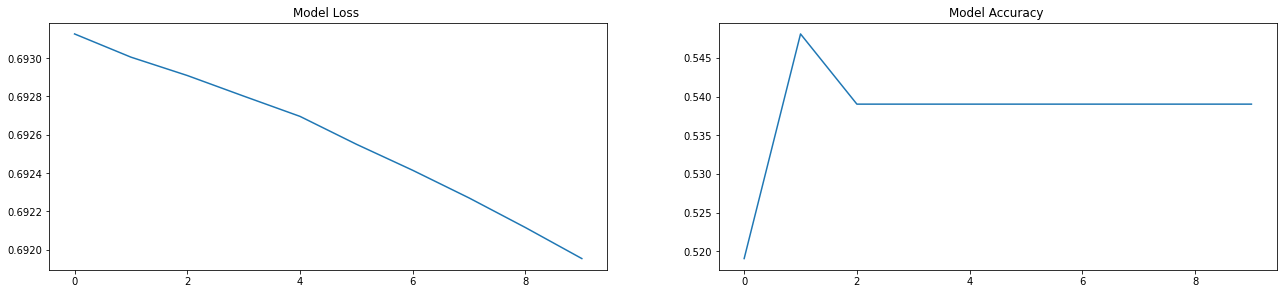

In [330]:
plt.figure(figsize=(22,10))


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 1)
plt.plot(Modelhistory.history['loss'])
plt.title('Model Loss ')


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 2)
plt.plot(Modelhistory.history['accuracy'])
plt.title('Model Accuracy ')


In [331]:
# Evaluating the Neural network Model's algorithm
 
testing_accuracy_model2 = mdl.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.6159


In [332]:
predictions = mdl.predict(x_test)

predictions[0]

y_test[0]

0.0

NOW COMPARING BOTH MODELS  (NN and RANDOM FOREST).


CONDITIONAL STATEMENT HELPS SHOW THE BEST MODEL


In [450]:
if np.where(testing_accuracy_model1 >= testing_accuracy_model2):
        print('Random Forest Model :', testing_accuracy_model1)
else:
        print('Neural Network Model :', testing_accuracy_model2)

Random Forest Model : 0.8115942028985508


In [449]:
print(" Between Random Forest Model Test Accuracy :", testing_accuracy_model1) 
print ("\n and Neural Network Model loss and Test Accuracy :", testing_accuracy_model2)


print("\n Results show the best model is " , testing_accuracy_model1)


 Between Random Forest Model Test Accuracy : 0.8115942028985508

 and Neural Network Model loss and Test Accuracy : [0.6907144784927368, 0.6159420013427734]

 Results show the best model is  0.8115942028985508


APPLYING THE CHOSEN MODEL TO OUR X_TEST

In [ ]:
#SAVING THE MODEL

In [391]:
with open('dt_model.pickle', 'wb')as f:
    pickle.dump(dt_model, f)
        

In [ ]:
#LOADING THE MODEL

In [392]:
with open('dt_model.pickle', 'rb')as f:
    model = pickle.load(f)

In [446]:
loaded_model = model.predict(x_test)
print(loaded_model)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1'
 '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0']
